In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split     
from sklearn import metrics  
import seaborn as sns
from sklearn.decomposition import PCA

import itertools
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve,precision_recall_curve, confusion_matrix, classification_report

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [3]:
data= pd.read_csv("C:/Users/Admin/Desktop/features_3_sec.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


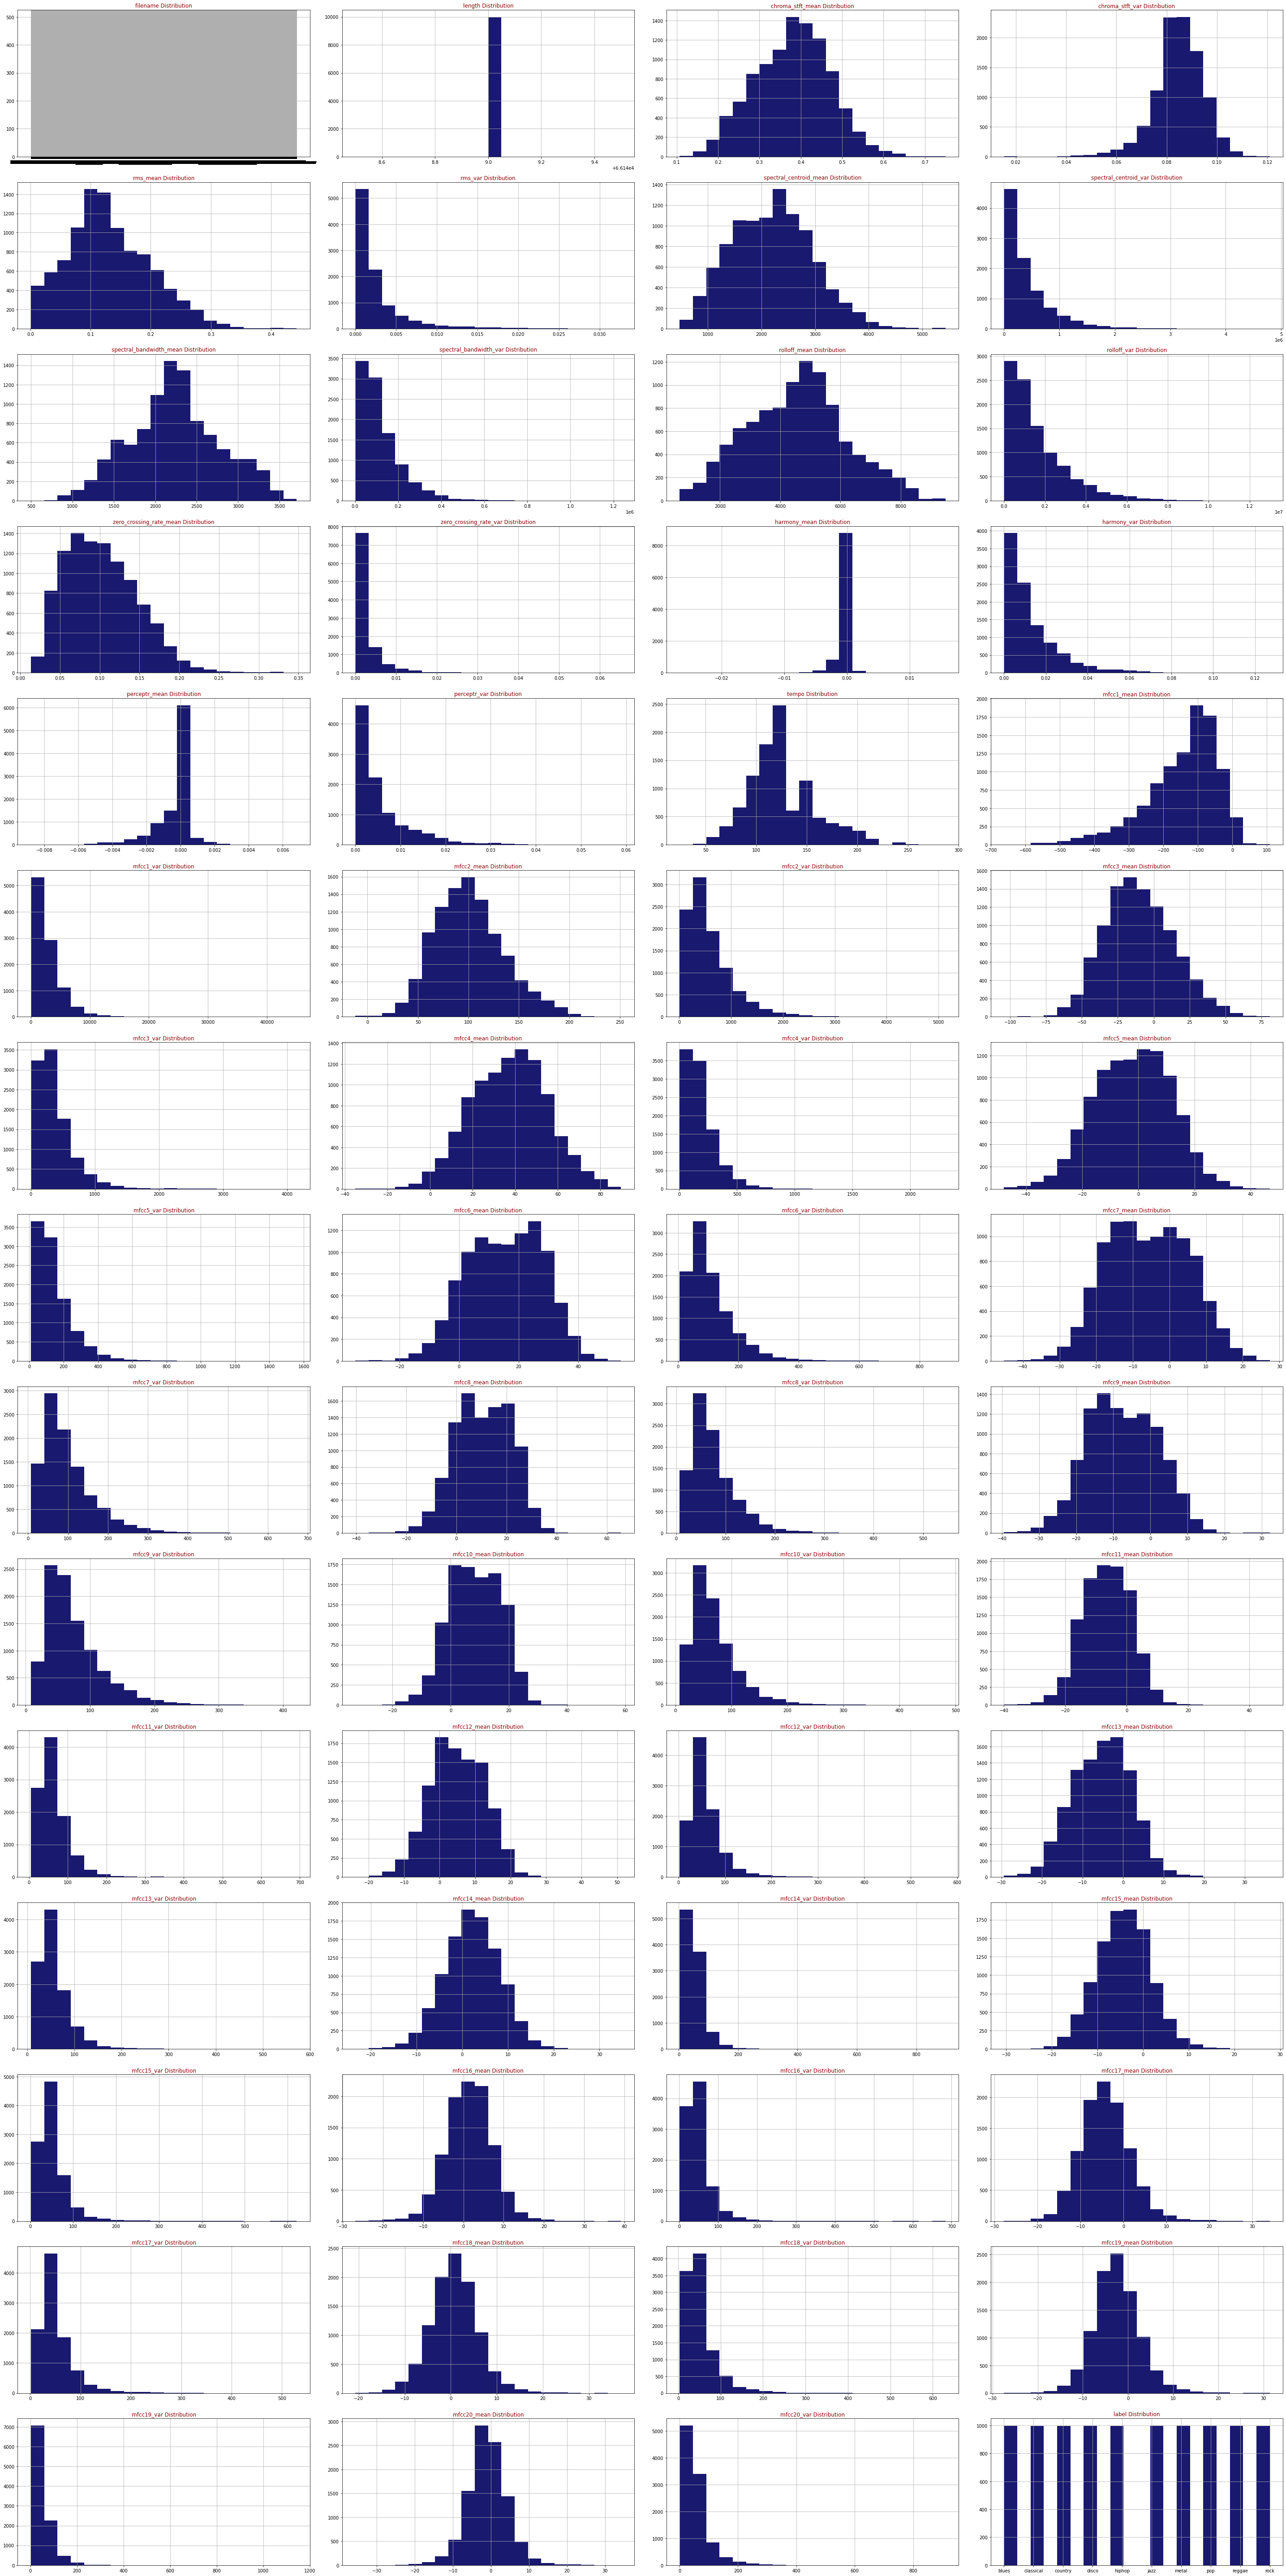

In [4]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        #ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
    
draw_histograms(data,data.columns,15,4)

In [5]:
data = data.iloc[0:,2:]
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label']

cols=X.columns

scaler=preprocessing.MinMaxScaler()
scaled_X=scaler.fit_transform(X)

X=pd.DataFrame(scaled_X,columns=cols)

In [44]:
le=LabelEncoder()
labels=le.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.3,random_state=21)

In [67]:
def plot_confusion_matrix(y_test,predict):
    cm = confusion_matrix(y_test,predict)
    conf_matrix=pd.DataFrame(data=cm,columns=['blues_pred', 'classical_pred', 'country_pred', 'disco_pred', 'hiphop_pred', 'jazz_pred', 'metal_pred', 'pop_pred', 'reggae_pred', 'rock_pred'],index=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')

In [46]:
# Function to plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [47]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return (roc_auc_score(y_test, y_pred, average=average))

# Decission Tree and Random Forest

In [48]:
def model_assess(model,title):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return preds
    

    # Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
model_assess(rforest, "Random Forest")


Accuracy Decission trees : 0.64998 

Accuracy Random Forest : 0.80013 



array([6, 6, 4, ..., 5, 1, 9])

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : range(10,15),
              'criterion' :['gini', 'entropy']
           
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_



Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 13}

In [50]:
model_pruned = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.001,max_leaf_nodes=1523,max_depth=13) # max_leaf_nodes is found by tuning in the above snippet
#model_pruned =model_pruned.fit(X_train, y_train)

    

In [51]:
predict=model_assess(model_pruned,"Hyperparametter tunned Decision tree")
print(predict)

Accuracy Hyperparametter tunned Decision tree : 0.65832 

[6 6 4 ... 5 1 9]


              precision    recall  f1-score   support

           0       0.62      0.66      0.64       290
           1       0.87      0.86      0.87       284
           2       0.50      0.50      0.50       310
           3       0.58      0.61      0.59       299
           4       0.71      0.69      0.70       319
           5       0.67      0.70      0.69       278
           6       0.78      0.77      0.78       323
           7       0.71      0.68      0.70       294
           8       0.62      0.57      0.60       309
           9       0.54      0.55      0.54       291

    accuracy                           0.66      2997
   macro avg       0.66      0.66      0.66      2997
weighted avg       0.66      0.66      0.66      2997



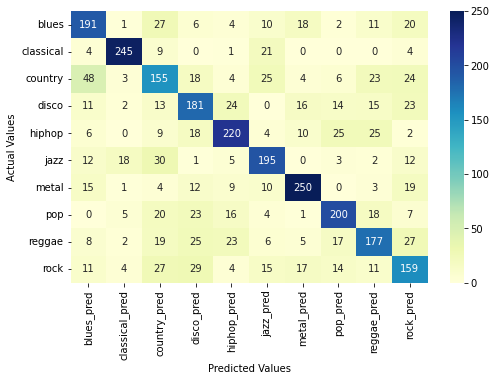

In [68]:

plot_confusion_matrix(y_test,predict)
print(classification_report(y_test, predict))

In [53]:
predictions = model_pruned.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, predictions[:,1],pos_label=1)

from sklearn.preprocessing import LabelBinarizer
tree_auc = multiclass_roc_auc_score(y_test, predict, average="macro")
tree_auc

0.8105747476243577

In [54]:
tpr

array([0.  , 0.66, 0.76, 0.79, 0.8 , 0.81, 0.83, 0.83, 0.84, 0.85, 0.85,
       0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88,
       1.  ])

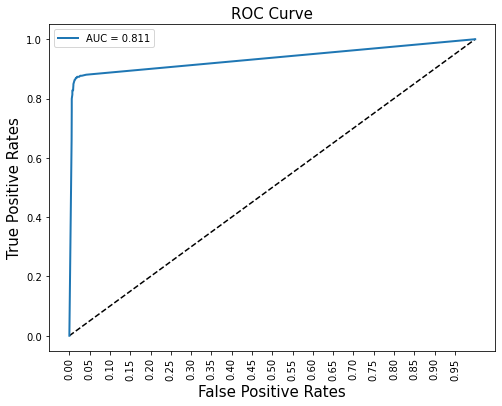

In [55]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % tree_auc)

In [56]:
clf = RandomForestClassifier(criterion='entropy',ccp_alpha=0.001,n_estimators = 1000,max_leaf_nodes=1523,random_state=42,max_depth=13) 



In [73]:
predict_rf=model_assess(clf,"Hyper_parameter tunned Random forest")
print(predict_rf)

Accuracy Hyper_parameter tunned Random forest : 0.84952 

[6 6 4 ... 5 1 9]


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       290
           1       0.92      0.95      0.93       284
           2       0.79      0.82      0.80       310
           3       0.79      0.83      0.81       299
           4       0.91      0.82      0.87       319
           5       0.84      0.88      0.86       278
           6       0.88      0.93      0.91       323
           7       0.91      0.84      0.88       294
           8       0.80      0.82      0.81       309
           9       0.84      0.70      0.76       291

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



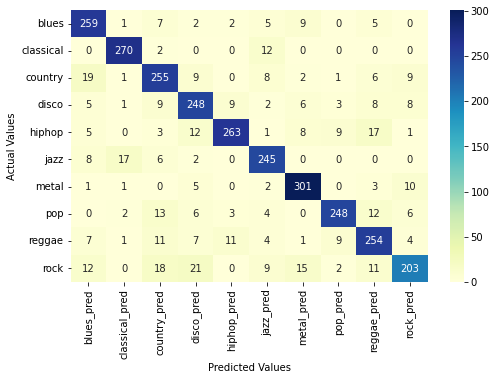

In [74]:
plot_confusion_matrix(y_test,predict_rf)
print(classification_report(y_test, predict_rf))

In [60]:
predictions_rf = clf.predict_proba(X_test)

fpr_rf, tpr_rf, _rf = roc_curve(y_test, predictions_rf[:,1],pos_label=1)

from sklearn.preprocessing import LabelBinarizer
rf_auc = multiclass_roc_auc_score(y_test, predict_rf, average="macro")
rf_auc

0.9164674242588611

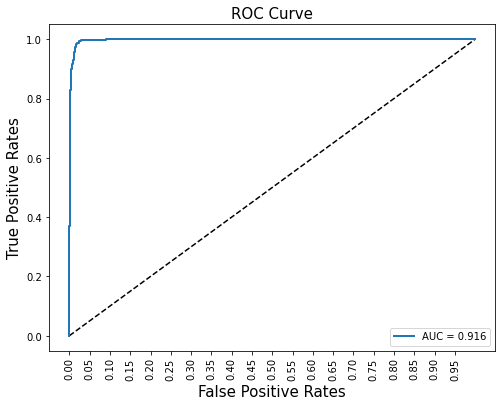

In [61]:
plot_roc_curve(fpr=fpr_rf, tpr=tpr_rf, label="AUC = %.3f" % rf_auc)